# Import the Modules

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Read the Data

In [29]:
data = pd.read_csv("spam.csv")

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Pre-processing

In [ ]:
data['Category'] = data['Category'].map({
    'ham': 0,
    'spam': 1
})

x = data['Message'].str.len().values.reshape(-1, 1) # converts string to the total length of the string and makes a 1-dimensional array of e.g. 42 rows, and it the value infers -1 it means that it will total all those rows into one row and one column to just [[42]]

y = data['Category']


# Split the data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Predicting and Training the data

In [32]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0])

# Accuracy of the Data

In [33]:
# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier Accuracy: {accuracy*100:.2f}'+'%')

Decision Tree Classifier Accuracy: 87.71%


# Visualize and Test


Decision Tree Classifier Matrix:


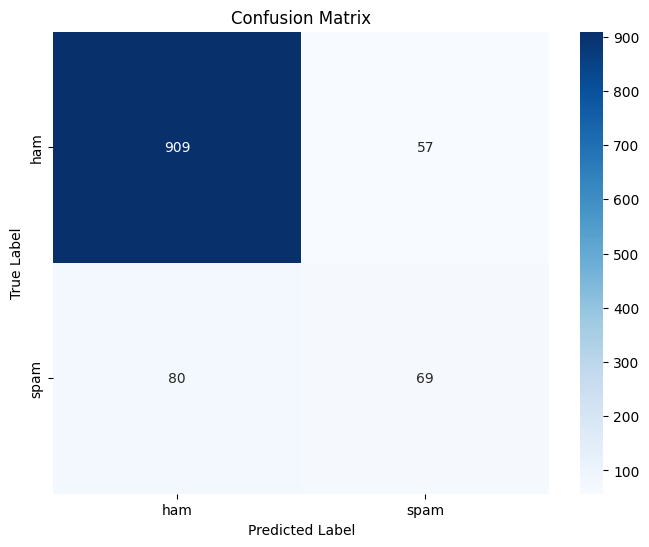

In [34]:
print('Decision Tree Classifier Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report

In [35]:
print('Decision Tree Classifier Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       966
           1       0.55      0.46      0.50       149

    accuracy                           0.88      1115
   macro avg       0.73      0.70      0.72      1115
weighted avg       0.87      0.88      0.87      1115



# Test the training model

In [36]:
# Function to predict new messages
def predict_message(message, model):
    # Convert message to numerical feature
    message_len = len(message)
    X_new = [[message_len]]
    prediction = model.predict(X_new)
    probability = model.predict_proba(X_new)
    return prediction[0], probability[0]

test_message = input("Enter a message and detext if it is spam or ham: ")
prediction, probability = predict_message(test_message, model)
print(f"\nTest message: {test_message}")
print(f"Prediction: {'spam' if prediction == 1 else 'ham'}")
print(f"Probability: Spam: {probability[1]:.4f}, Ham: {probability[0]:.4f}")


Test message: 
Prediction: ham
Probability: Spam: 0.0000, Ham: 1.0000
